In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Iris_data.csv")
df=df.drop(["Id"],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

**We have 5 Features and 150 columns in our dataset**

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.duplicated().sum()
df=df.drop_duplicates()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
skewness={}
for i in df.drop(["Species"],axis=1):
  s=df[i].skew()
  skewness[i]=s

feature=[]
Val=[]
Skew_type=[]
for key, value in skewness.items():
  feature.append(key)
  Val.append(value)
  t=1
  if value>0.5:
    t=2
  if value<-0.5:
    t=3
  if t==1:
    ty="Normal"
  if t==2:
    ty="Positively skewed"
  if t==3:
    ty="Negatively Skewed"
  Skew_type.append(ty)
Skew_df=pd.DataFrame({"Feature":feature,"Skewness":Val,"Nature":Skew_type})
Skew_df

,Feature,Skewness,Nature
0,Sepal_Length,0.292560,Normal
1,Sepal_Width,0.324351,Normal
2,Petal_Length,-0.293763,Normal
3,Petal_Width,-0.113479,Normal


**All the features are Normally distributed**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


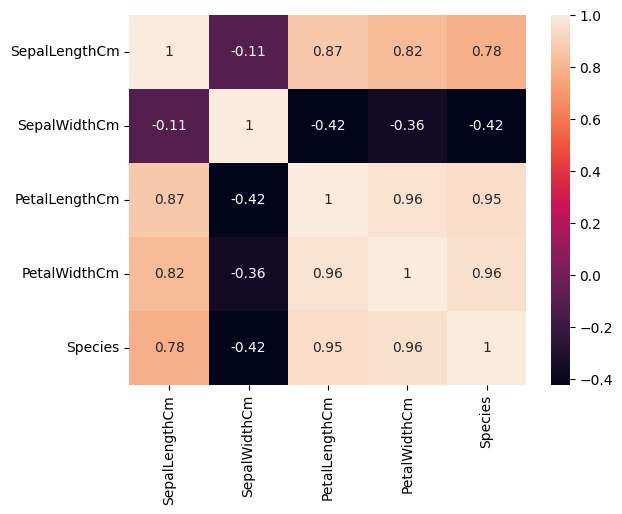

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)
corr

<Axes: >

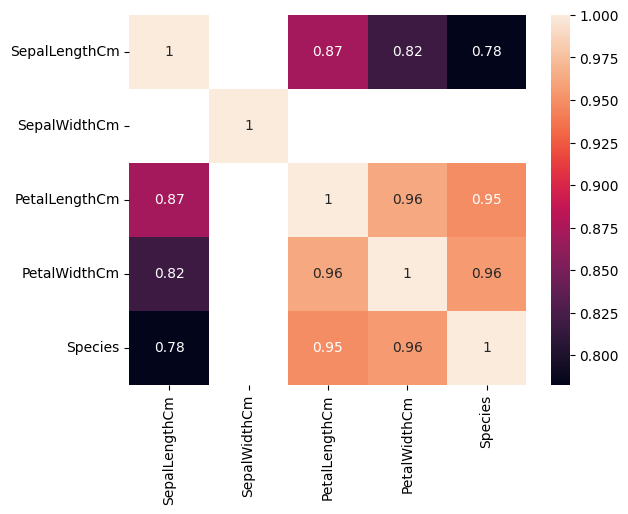

In [ ]:
df_cor=corr.copy()
for i in corr.columns:
  df_cor[i]=np.where((corr[i]>=0.60)| (corr[i]<=-0.60),corr[i],np.nan)

sns.heatmap(df_cor,annot=True)

*  **Below Features are highly correlated with target variable:**
1. Sepal_length.
2. Petal_length.
3. Petal_Width.

*  **Features which are multicolinear:**
1. Sepal_length, Petal_Width, and Petal_length.

In [ ]:
df[["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width"]]=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
df=df.iloc[::,4:]
df

,Species,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3
146,2,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3


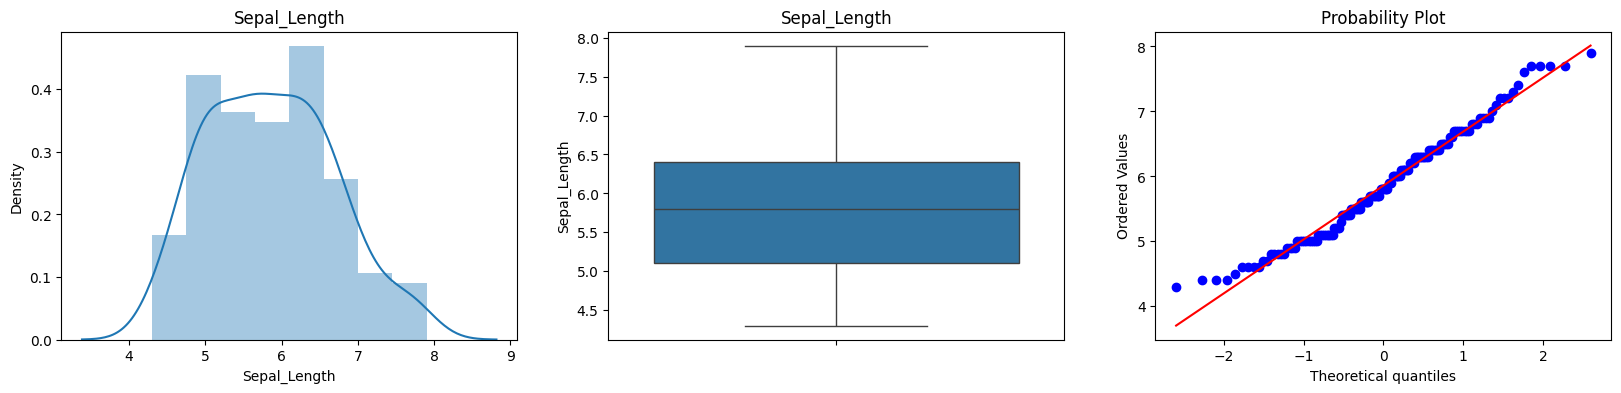

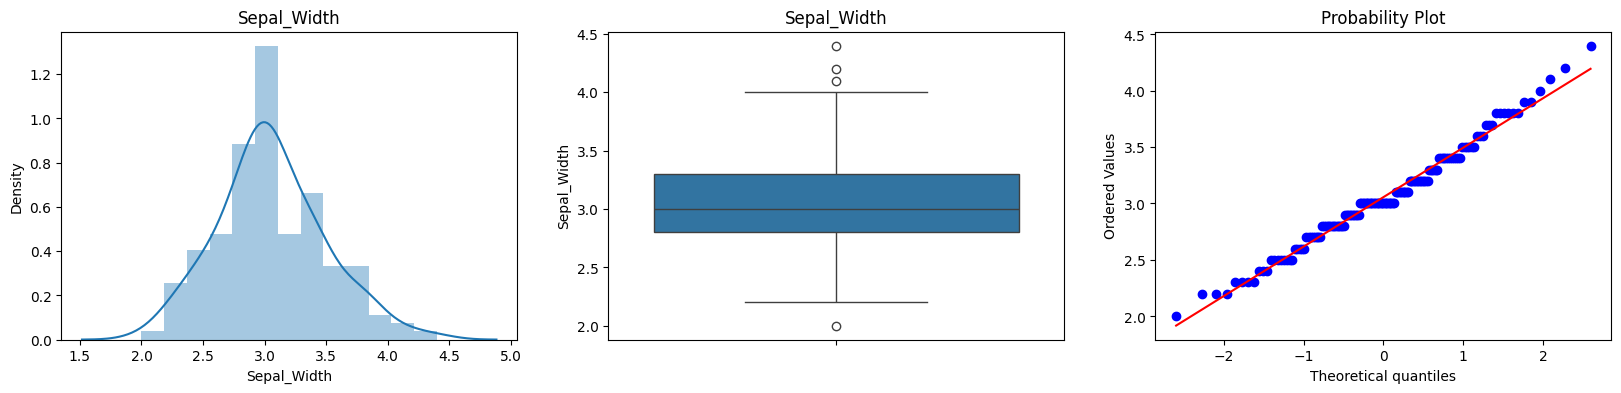

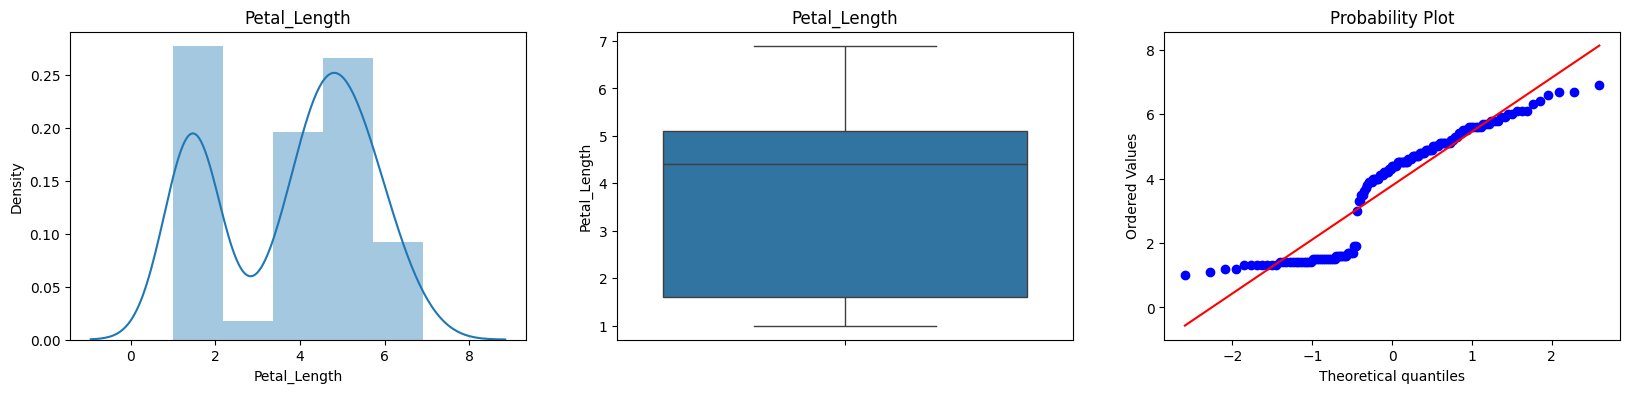

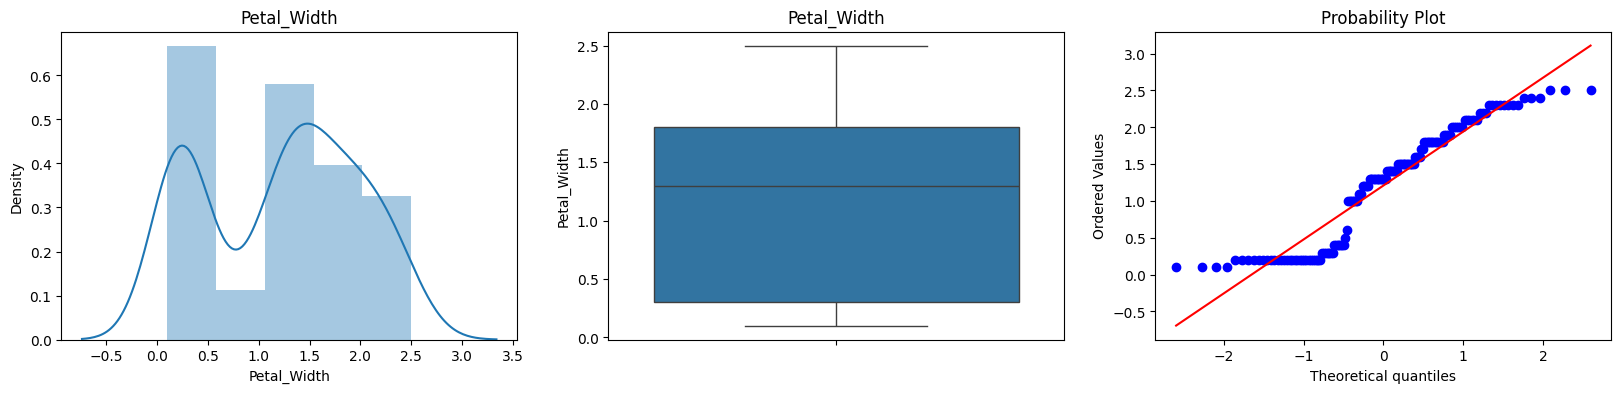

In [ ]:
for i in df.iloc[:,1:]:
  plt.figure(figsize=(20,4))
  plt.subplot(131)
  sns.distplot(df[i])
  plt.title(i)

  plt.subplot(132)
  sns.boxplot(df[i])
  plt.title(i)

  plt.subplot(133)
  sts.probplot(df[i],dist="norm",plot=plt)
  plt.show()


**Sepal Width consists some outliers.**

In [ ]:
def outliers_detail(df, df_num_col):
    lower_lim = []
    upper_lim = []
    outlier_num = []
    out_per=[]
    for col in df_num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_lim = round((Q1 - 1.5 * IQR), 0)
        Upper_lim = round((Q3 + 1.5 * IQR), 0)
        lower_lim.append(Lower_lim)
        upper_lim.append(Upper_lim)
        outliers_in_column = df[(df[col] < Lower_lim) | (df[col] > Upper_lim)]
        outlier_num.append(len(outliers_in_column))
        out_per.append(round(len(outliers_in_column)/len(df),3)*100)
    outlier_df = pd.DataFrame({
        'Column': df_num_col,
        'Lower Limit': lower_lim,
        'Upper Limit': upper_lim,
        'No of Outliers': outlier_num,
        "Outlier(%)":out_per
    })

    return outlier_df



outliers_detail(df,df.drop(["Species"],axis=1).columns)

,Column,Lower Limit,Upper Limit,No of Outliers,Outlier(%)
0,Sepal_Length,3.0,8.0,0,0.0
1,Sepal_Width,2.0,4.0,3,2.0
2,Petal_Length,-4.0,10.0,0,0.0
3,Petal_Width,-2.0,4.0,0,0.0


In [ ]:
def outliers(df, df_num_col):
  outlier_indices = set()
  for i in df_num_col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    Lower_lim = round((Q1 - 1.5 * IQR), 0)
    Upper_lim = round((Q3 + 1.5 * IQR), 0)
    outlier_idx = df[(df[i] < Lower_lim) | (df[i] > Upper_lim)].index
    outlier_indices.update(outlier_idx)
  df_filt = df.drop(index=outlier_indices)
  return df_filt

df_filt=outliers(df,df.drop(["Species"],axis=1).columns)
outliers_detail(df_filt,df.drop(["Species"],axis=1).columns)

,Column,Lower Limit,Upper Limit,No of Outliers,Outlier(%)
0,Sepal_Length,3.0,8.0,0,0.0
1,Sepal_Width,2.0,4.0,0,0.0
2,Petal_Length,-4.0,10.0,0,0.0
3,Petal_Width,-2.0,4.0,0,0.0


**Outliers removed using IQR method**

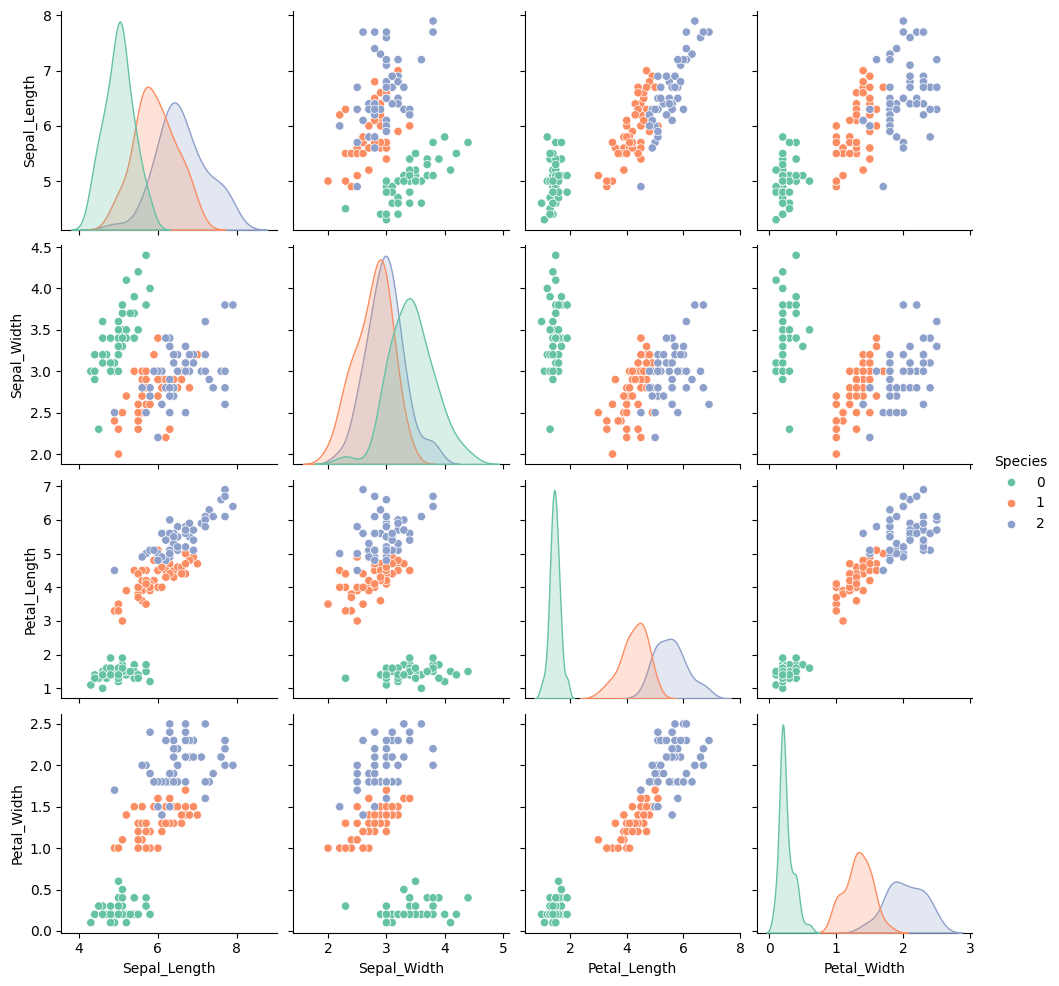

In [ ]:
sns.pairplot(df,hue="Species",palette="Set2")

**The Pairplot indicated that:**
1. **class 0 i.e., Setosa is easily classified on the basis of Petal length and Petal width (Flower with Petal length=(0-2) and Petal width=(0-1) is most likely belongs to Setosa Class)**
2. **Petal length and width of virinica class is higest among all of them.**

In [ ]:
x=df.drop(["Species"],axis="columns")
y=df["Species"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)
X_train=X_train.reset_index(drop=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
clf_log=RandomizedSearchCV(estimator=LogisticRegression(),param_distributions={"C":[1,10,20,30],"penalty":["l1","l2"],'solver': ['liblinear', 'saga']},cv=5,n_iter=50,random_state=100)
model_log=clf_log.fit(X_train,Y_train)
para_log=model_log.best_params_
score_log=round(model_log.best_score_,3)
r=print(f'Best parameters={para_log}, Best Score={score_log}')
r
results_log=pd.DataFrame(model_log.cv_results_)

Best parameters={'solver': 'saga', 'penalty': 'l2', 'C': 1}, Best Score=0.99


In [ ]:
clf_SVC=RandomizedSearchCV(estimator=SVC(),param_distributions={"C":[1,10,20,30,40.50],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},cv=5,n_iter=50,random_state=100)
model_SVC=clf_SVC.fit(X_train,Y_train)
para_SVC=model_SVC.best_params_
score_SVC=round(model_SVC.best_score_,3)
r=print(f'Best parameters={para_SVC}, Best Score={score_SVC}')
r
results_SVC=pd.DataFrame(model_SVC.cv_results_)

Best parameters={'kernel': 'linear', 'C': 1}, Best Score=0.981


In [ ]:
clf_DT=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions={'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 20, 30]},cv=5,n_iter=200,random_state=10)
model_DT=clf_DT.fit(X_train,Y_train)
para_DT=model_DT.best_params_
score_DT=round(model_DT.best_score_,3)
r= print(f'Best parameters={para_DT}, Best Score={score_DT}')
r
results_DT=pd.DataFrame(model_DT.cv_results_)


Best parameters={'max_depth': None, 'criterion': 'gini'}, Best Score=0.961


In [ ]:
clf_RF=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions={'n_estimators': [1,5,10,20],'max_depth': [None, 5, 10, 20, 30],},cv=5,n_iter=200,random_state=10)
model_RF=clf_RF.fit(X_train,Y_train)
para_RF=model_RF.best_params_
score_RF=round(model_DT.best_score_,3)
r=print(f'Best parameters={para_RF}, Best Score={score_RF}')
r
results_RF=pd.DataFrame(model_RF.cv_results_)

Best parameters={'n_estimators': 5, 'max_depth': 5}, Best Score=0.961


In [ ]:
model=["LogisticRegression","SCV","Decision Tree","Random Forest"]
parameter=[para_log,para_SVC,para_DT,para_RF,]
Best_Score=[score_log,score_SVC,score_DT,score_RF]

d={"Model":model,"Best Parameter":parameter,"Best Score":Best_Score}

Model_eval=pd.DataFrame(d)
Model_eval

,Model,Best Parameter,Best Score
0,LogisticRegression,"{'solver': 'saga', 'penalty': 'l2', 'C': 1}",0.990
1,SCV,"{'kernel': 'linear', 'C': 1}",0.981
2,Decision Tree,"{'max_depth': None, 'criterion': 'gini'}",0.961
3,Random Forest,"{'n_estimators': 5, 'max_depth': 5}",0.961


* **By comparing classification model performance on dataset we conclude that Logistic Regression is working excellent, So we will use this algo for out our model.**

In [ ]:
final_model=LogisticRegression(solver="saga", penalty="l1", C=1)
final_model.fit(X_train,Y_train)
Y_pred=final_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
Final_score=round(accuracy_score(Y_pred,Y_test),4)
print(f'The accuracy of the model is {Final_score*100}%')

The accuracy of the model is 97.78%


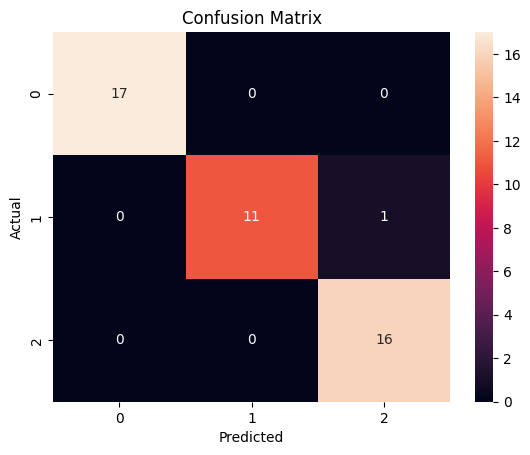

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
_=plt.ylabel("Actual")

In [ ]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

